In [1]:
# [Import] Import the OS
import os

# [Message] Write a friendly message for the user.
print("Welcome to the Software Developer Assessment:")

Welcome to the Software Developer Assessment:


In [2]:
# [Import] Import Pandas & Matplotlib or install them
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    print("Success : Matplotlib and Pandas were imported successfully into the project")
except ImportError:
    !pip install pandas matplotlib
    import pandas as pd
    import matplotlib.pyplot as plt
    print("Success : Matplotlib and Pandas were installed successfully into the project")

Success : Matplotlib and Pandas were imported successfully into the project


In [3]:
# [Import] Importing required MySQL dependencies.
import mysql.connector # MySQL connector was installed using terminal separately. Hence it does not need to be installed at this point.

In [4]:
# [Create a Configuration Variable to specify Database Connection Details]
config = {
    'user': 'root',
    'password': 'password',
    'host': '127.0.0.1',
    'port': '3306',
    'database': 'fastfoods'
}

# [Establish Connection with Database] Using a try-except block to establish a connection with the database.
try:
    connection_object = mysql.connector.connect(**config)
    print("Success: Connection with MySQL successful using the provided credentials!")
except ERROR_Connection_Failed:
    print("ERROR: Connection could not be established with MySQL Server. Please check your connection credentials.")

Success: Connection with MySQL successful using the provided credentials!


In [5]:
# [Database Setup] Drop and Create a new table to hold the data from the CSV file.

# create cursor objects
cursor = connection_object.cursor()

# check if table exists
table_name = "fast_foods"

try:
    # [Execute a query using cursor] 
    cursor.execute(f"SHOW TABLES LIKE '{table_name}'")
    result = cursor.fetchone()

    if result:
        # drop table if it exists
        cursor.execute(f"DROP TABLE {table_name}")
        print("Success: Table with old data was deleted. A new one has been created in its place.")
    else:
        print("Success: A new table has been created.")
        
except mysql.connector.Error as error:
    print(f"Error: {error.msg}")

# create table
#cursor.execute(f"CREATE TABLE {table_name} (restaurant varchar(50), item varchar(100) PRIMARY KEY, calories int, cal_fat int, total_fat DECIMAL(10,2), sat_fat DECIMAL(10,2), trans_fat DECIMAL(10,2), cholesterol DECIMAL(10,2), sodium DECIMAL(10,2), total_carb DECIMAL(10,2), fiber DECIMAL(10,2), sugar DECIMAL(10,2), protein DECIMAL(10,2), vit_a DECIMAL(10,2), vit_c DECIMAL(10,2), calcium DECIMAL(10,2), salad varchar(50))")
cursor.execute(f"CREATE TABLE {table_name} (restaurant varchar(50), item varchar(100), calories int, cal_fat int, total_fat DECIMAL(10,2), sat_fat DECIMAL(10,2), trans_fat DECIMAL(10,2), cholesterol DECIMAL(10,2), sodium DECIMAL(10,2), total_carb DECIMAL(10,2), fiber DECIMAL(10,2), sugar DECIMAL(10,2), protein DECIMAL(10,2), vit_a DECIMAL(10,2), vit_c DECIMAL(10,2), calcium DECIMAL(10,2), salad varchar(50))")


# commit changes to database
connection_object.commit()


Success: Table with old data was deleted. A new one has been created in its place.


In [6]:
# [Test] Testing Insertion into the above created table.

try:
    cursor.execute("INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Mcdonalds', 'Artisan Grilled Chicken Sandwich', 380, 60, 7.0, 2.0, 0.0, 95, 1110, 44, 3.0, 11, 37.0, 4.0, 20.0, 20.0, 'Other')")
    connection_object.commit()
    print("Success: Inserted data into fast_foods table.")
except mysql.connector.Error as error:
    print(f"Error: {error.msg}")

Success: Inserted data into fast_foods table.


In [7]:
# [Cleaning the table] Deleting all the data from the table and preparing it for data upload via CSV file.

try:
    cursor.execute("DELETE from fast_foods")
    print("Success: All records have been deleted from the table.")
except mysql.connector.Error as error:
    print(f"Error: {error.msg}")


Success: All records have been deleted from the table.


In [8]:
# [Open the CSV File] Open the CSV file and read its contents.

# get the current working directory
cwd = os.getcwd()

# specify the path to the CSV file
csv_file_path = os.path.join(cwd, 'resources', 'fastfood.csv')
print (csv_file_path)

# read the CSV file using pandas
fastfoods_csv = pd.read_csv(csv_file_path)

# [Inline Test Statements]
# print(fastfoods_csv.head(5)) # print the first 5 lines of the CSV file
# 
print(fastfoods_csv) # print all the lines of the CSV file
# 
print("Total Number of Rows in CSV File : ")
print(fastfoods_csv.shape[0]) # get the number of rows in the DataFrame

fastfoods_csv.fillna(0, inplace=True)
print(fastfoods_csv) # print all the lines of the CSV file

# # replace all occurrences of 'n with 'and'
# fastfoods_csv = fastfoods_csv.replace({"'n": "and"}, regex=True)

# # replace all occurrences of n' with 'and'
# fastfoods_csv = fastfoods_csv.replace({"n'": "and"}, regex=True)

# # replace all occurrences of n' with 'and'
fastfoods_csv = fastfoods_csv.replace({"'": ""}, regex=True)

#fastfoods_csv = fastfoods_csv.replace({"'": ''}, regex=True, inplace=True)

C:\Users\itsad\Desktop\2023_04_10_Assessment\SRC\resources\fastfood.csv
    restaurant                                       item  calories  cal_fat  \
0    Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1    Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2    Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3    Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4    Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
..         ...                                        ...       ...      ...   
510  Taco Bell             Spicy Triple Double Crunchwrap       780      340   
511  Taco Bell                Express Taco Salad w/ Chips       580      260   
512  Taco Bell                     Fiesta Taco Salad-Beef       780      380   
513  Taco Bell                  Fiesta Taco Salad-Chicken       720      320   
514  Taco Bell                    Fiesta Taco Sa

In [9]:
# [Replacing NaN fields]

In [10]:
# insert data into table
for i, row in fastfoods_csv.iterrows():
    restaurant = str(row['restaurant'])
    item = str(row['item'])
    calories = int(row['calories'])
    cal_fat = int(row['cal_fat'])
    total_fat = float(row['total_fat'])
    sat_fat = float(row['sat_fat'])
    trans_fat = float(row['trans_fat'])
    cholesterol = float(row['cholesterol'])
    sodium = float(row['sodium'])
    total_carb = float(row['total_carb'])
    fiber = float(row['fiber'])
    sugar = float(row['sugar'])
    protein = float(row['protein'])
    vit_a = float(row['vit_a'])
    vit_c = float(row['vit_c'])
    calcium = float(row['calcium'])
    salad = str(row['salad'])
    try:
        insert_query = f"INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('{restaurant}', '{item}', {calories}, {cal_fat}, {total_fat}, {sat_fat}, {trans_fat}, {cholesterol}, {sodium}, {total_carb}, {fiber}, {sugar}, {protein}, {vit_a}, {vit_c}, {calcium}, '{salad}')"
        #[Inline Test Statement] 
        print("---------------------------------------------")
        print(insert_query)
        # execute the insert query
        cursor.execute(insert_query)
        # commit changes to database
        connection_object.commit()
        #print(f"Successfully inserted {restaurant} - {item}")
    except mysql.connector.Error as error:
        # catch any errors and print the message
        print("---------------------------------------------")
        print(f"Error inserting {restaurant} - {item}: {error}")
        
 

---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Mcdonalds', 'Artisan Grilled Chicken Sandwich', 380, 60, 7.0, 2.0, 0.0, 95.0, 1110.0, 44.0, 3.0, 11.0, 37.0, 4.0, 20.0, 20.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Mcdonalds', 'Single Bacon Smokehouse Burger', 840, 410, 45.0, 17.0, 1.5, 130.0, 1580.0, 62.0, 2.0, 18.0, 46.0, 6.0, 20.0, 20.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Mcdonalds', 'Double Bacon Smo

---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Chick Fil-A', 'Smokehouse BBQ Bacon Sandwich', 500, 162, 18.0, 0.0, 0.0, 95.0, 1200.0, 46.0, 2.0, 10.0, 33.0, 45.0, 40.0, 20.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Chick Fil-A', 'Spicy Chicken Sandwich', 450, 171, 19.0, 4.0, 0.0, 60.0, 1620.0, 41.0, 1.0, 5.0, 29.0, 4.0, 2.0, 15.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Chick Fil-A', 'Spicy Deluxe', 540, 22

---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Arbys', 'Ham & Swiss Melt', 300, 80, 9.0, 4.0, 0.0, 35.0, 1030.0, 37.0, 2.0, 6.0, 18.0, 2.0, 0.0, 15.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Arbys', 'Loaded Italian Sandwich', 680, 360, 40.0, 14.0, 0.5, 100.0, 2270.0, 49.0, 3.0, 7.0, 32.0, 0.0, 0.0, 0.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Arbys', 'Pecan Chicken Salad Flatbread', 710, 410, 46.0, 7.0, 0.5

---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Burger King', 'Crispy Buffalo Chicken Melt', 580, 252, 28.0, 8.0, 0.5, 70.0, 2310.0, 56.0, 0.0, 8.0, 30.0, 0.0, 0.0, 0.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Burger King', 'Crispy Chicken Jr.', 430, 250, 28.0, 4.5, 0.0, 30.0, 760.0, 34.0, 2.0, 4.0, 12.0, 0.0, 0.0, 0.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Burger King', 'Crispy Chicken Sandwich', 670, 370

---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Subway', 'Footlong Cold Cut Combo', 740, 240, 26.0, 8.0, 0.0, 100.0, 2280.0, 92.0, 10.0, 14.0, 36.0, 20.0, 40.0, 70.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Subway', '6" Corned Beef Reuben', 470, 130, 15.0, 4.5, 0.0, 85.0, 1770.0, 45.0, 7.0, 12.0, 39.0, 10.0, 35.0, 20.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Subway', 'Footlong Corned Beef Reuben', 940, 260,

---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Subway', 'Roast Beef Salad', 140, 30, 4.0, 1.0, 0.0, 40.0, 450.0, 10.0, 4.0, 5.0, 18.0, 25.0, 45.0, 4.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Subway', 'Spicy Italian Salad', 310, 205, 23.0, 9.0, 1.0, 50.0, 1280.0, 11.0, 4.0, 6.0, 15.0, 50.0, 50.0, 8.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Subway', 'Steak & Cheese Salad', 210, 75, 8.0, 4.0, 0.0, 50.0, 830.

---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Taco Bell', 'Cool Ranch Habanero Double Stacked Taco', 350, 180, 20.0, 8.0, 0.5, 40.0, 630.0, 30.0, 4.0, 3.0, 13.0, 15.0, 2.0, 20.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Taco Bell', 'Nacho Crunch Double Stacked Taco', 380, 170, 19.0, 6.0, 0.0, 35.0, 650.0, 39.0, 5.0, 2.0, 13.0, 8.0, 2.0, 20.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Taco Bell', 'Fiery Dorito

---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Taco Bell', 'Spicy Triple Double Crunchwrap', 780, 340, 38.0, 10.0, 0.5, 50.0, 1850.0, 87.0, 9.0, 8.0, 23.0, 20.0, 10.0, 25.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Taco Bell', 'Express Taco Salad w/ Chips', 580, 260, 29.0, 9.0, 1.0, 60.0, 1270.0, 59.0, 8.0, 7.0, 23.0, 0.0, 0.0, 0.0, 'Other')
---------------------------------------------
INSERT INTO fast_foods (restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium, salad) VALUES ('Taco Bell', 'Fiesta Taco Salad-Beef'

In [11]:
# [Count the total number of rows in the table]

# execute a SELECT COUNT(*) statement on the table
table_name = 'fast_foods'
query = f"SELECT COUNT(*) FROM {table_name}"
cursor.execute(query)

# retrieve the result
result = cursor.fetchone()
total_records = result[0]

# print the total number of records
print(f"Total records in {table_name} table: {total_records} and total number of rows in CSV file is : {fastfoods_csv.shape[0]}")
print(f"Note-  If both these numbers is equal then all the data is properly inserted into the table.")

Total records in fast_foods table: 515 and total number of rows in CSV file is : 515
Note-  If both these numbers is equal then all the data is properly inserted into the table.


In [12]:
# [Calculations]
# Define the query
query = "USE fastfoods; SELECT restaurant, AVG(calories) AS avg_calories, MIN(calories) AS min_calories, MAX(calories) AS max_calories, AVG(total_carb) AS avg_carbs FROM fast_foods GROUP BY restaurant ORDER BY avg_carbs ASC;"

# Execute the query
cursor.execute(query)

# Call cursor.nextset() to move to the next query result
cursor.nextset()

# Fetch the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)


('Chick Fil-A', Decimal('384.4444'), 70, 970, Decimal('28.629630'))
('Dairy Queen', Decimal('520.2381'), 20, 1260, Decimal('38.690476'))
('Burger King', Decimal('608.5714'), 190, 1550, Decimal('39.314286'))
('Arbys', Decimal('532.7273'), 70, 1030, Decimal('44.872727'))
('Taco Bell', Decimal('443.6522'), 140, 880, Decimal('46.634783'))
('Sonic', Decimal('631.6981'), 100, 1350, Decimal('47.207547'))
('Mcdonalds', Decimal('640.3509'), 140, 2430, Decimal('48.789474'))
('Subway', Decimal('503.0208'), 50, 1160, Decimal('54.718750'))


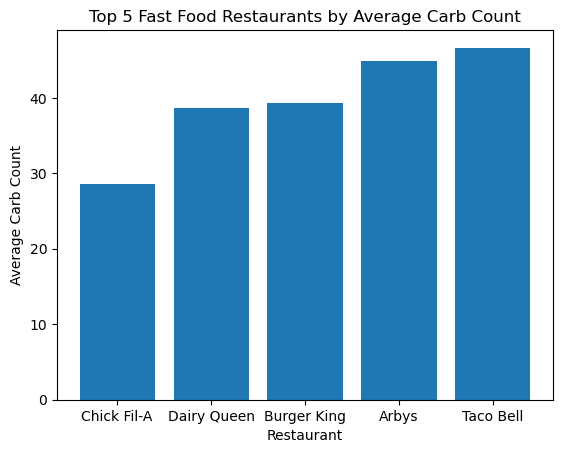

In [13]:
# [Building a Plot] Building a plot using the Matplotlib and Numpy to demonstrate data visualization

import matplotlib.pyplot as plt
import numpy as np

# Define the query
query = "SELECT restaurant, AVG(calories) AS avg_calories, MIN(calories) AS min_calories, MAX(calories) AS max_calories, AVG(total_carb) AS avg_carbs FROM fast_foods GROUP BY restaurant ORDER BY avg_carbs ASC;"

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Extract data for the top 5 restaurants
top_restaurants = []
for i in range(min(5, len(results))):
    top_restaurants.append(results[i])

# Extract the restaurant names and average carb counts
restaurant_names = [row[0] for row in top_restaurants]
avg_carbs = [float(row[4]) for row in top_restaurants]

# Create a bar chart of the top 5 restaurants by average carb count
plt.bar(restaurant_names, avg_carbs)
plt.title("Top 5 Fast Food Restaurants by Average Carb Count")
plt.xlabel("Restaurant")
plt.ylabel("Average Carb Count")
plt.show()


In [16]:
# [Classification of Items] Items classified based on calories (Side Dish = 699 calories or less. Main Dish = 700 calories or more) and contents (Chicken, Beef, Pork, Seafood, Other) or as Dessert (if it fits the definition of dessert)
# define the query
query = "SELECT item, calories, \
    CASE \
        WHEN (item LIKE '%cake%' OR item LIKE '%cookie%' OR item LIKE '%\\bpie\\b%' OR item LIKE '%pudding%' OR item LIKE '%ice cream%' OR item LIKE '%gelato%' OR item LIKE '%sorbet%' OR item LIKE '%fruit%') THEN 'Dessert' \
        WHEN calories < 700 THEN 'Side Dish' \
        WHEN item LIKE '%chicken%' THEN 'Main - Chicken' \
        WHEN item LIKE '%beef%' THEN 'Main - Beef' \
        WHEN item LIKE '%pork%' OR item LIKE '%sausage%' OR item LIKE '%bacon%' THEN 'Main - Pork' \
        WHEN item LIKE '%seafood%' OR item LIKE '%lobster%' OR item LIKE '%shrimp%' OR item LIKE '%crab%' OR item LIKE '%fish%' THEN 'Main - Seafood' \
        ELSE 'Main - Other' \
    END AS category \
FROM fast_foods"

# execute the query
cursor.execute(query)

# fetch all rows from the result set
results = cursor.fetchall()

# print the results
for row in results:
  print(row)


('Artisan Grilled Chicken Sandwich', 380, 'Side Dish')
('Single Bacon Smokehouse Burger', 840, 'Main - Pork')
('Double Bacon Smokehouse Burger', 1130, 'Main - Pork')
('Grilled Bacon Smokehouse Chicken Sandwich', 750, 'Main - Chicken')
('Crispy Bacon Smokehouse Chicken Sandwich', 920, 'Main - Chicken')
('Big Mac', 540, 'Side Dish')
('Cheeseburger', 300, 'Side Dish')
('Classic Chicken Sandwich', 510, 'Side Dish')
('Double Cheeseburger', 430, 'Side Dish')
('Double Quarter Pounder® with Cheese', 770, 'Main - Other')
('Filet-O-Fish®', 380, 'Side Dish')
('Garlic White Cheddar Burger', 620, 'Side Dish')
('Grilled Garlic White Cheddar Chicken Sandwich', 530, 'Side Dish')
('Crispy Garlic White Cheddar Chicken Sandwich', 700, 'Main - Chicken')
('Hamburger', 250, 'Side Dish')
('Lobster Roll', 290, 'Side Dish')
('Maple Bacon Dijon 1/4 lb Burger', 640, 'Side Dish')
('Grilled Maple Bacon Dijon Chicken Sandwich', 580, 'Side Dish')
('Crispy Maple Bacon Dijon Chicken Sandwich', 740, 'Main - Chicken')
(

C:\Users\itsad\AppData\Local\Temp\ipykernel_15736\4282813893.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results = pd.read_sql_query(query, connection_object)


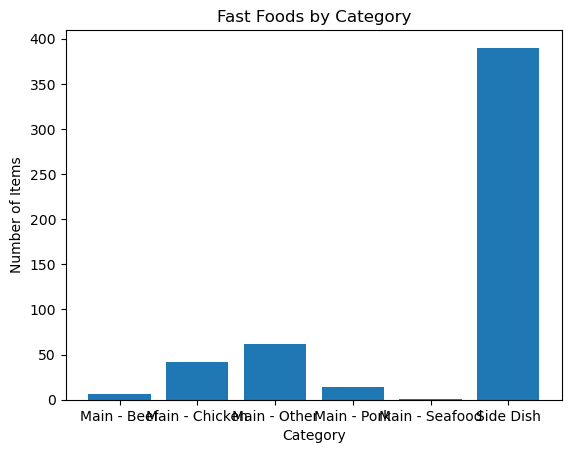

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyodbc

# connect to SQL Server and execute the query
query = "SELECT item, calories, \
    CASE \
        WHEN (item LIKE '%cake%' OR item LIKE '%cookie%' OR item LIKE '%\\bpie\\b%' OR item LIKE '%pudding%' OR item LIKE '%ice cream%' OR item LIKE '%gelato%' OR item LIKE '%sorbet%' OR item LIKE '%fruit%') THEN 'Dessert' \
        WHEN calories < 700 THEN 'Side Dish' \
        WHEN item LIKE '%chicken%' THEN 'Main - Chicken' \
        WHEN item LIKE '%beef%' THEN 'Main - Beef' \
        WHEN item LIKE '%pork%' OR item LIKE '%sausage%' OR item LIKE '%bacon%' THEN 'Main - Pork' \
        WHEN item LIKE '%seafood%' OR item LIKE '%lobster%' OR item LIKE '%shrimp%' OR item LIKE '%crab%' OR item LIKE '%fish%' THEN 'Main - Seafood' \
        ELSE 'Main - Other' \
    END AS category \
FROM fast_foods"
results = pd.read_sql_query(query, connection_object)

# create a pivot table to group the items by category
pivot_table = pd.pivot_table(results, values='calories', index=['category'], aggfunc='count')

# plot the pivot table as a bar chart
x_labels = pivot_table.index
y_values = pivot_table['calories']
plt.bar(x_labels, y_values)
plt.title('Fast Foods by Category')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.show()


In [23]:
# close the cursor
try:
    cursor.close()
    print("Success: Cursor is closed")
except:
    print("Error: Cursor is not closed")
    pass
    
# close the database connection
try:
    connection_object.close()
    print("Success: Database Connection is closed")
except:
    print("Error: Database Connection is not closed")
    pass

Success: Cursor is closed
Success: Database Connection is closed
